In [1]:
#Importing libraries
import pandas as pd             #Dataframe
import numpy as np              #Numeric analysis
%matplotlib inline

In [2]:
data = pd.read_csv("bank_data.csv", delimiter=";")
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In [3]:
#Let's only choose a few variables to work for now
data = data[['age','balance','duration','y']]

#Recoding the y column as 1 and 0
data["y1"] = np.where(data["y"].str.contains("yes"), 1, 0)
data = data.loc[:, data.columns!='y']
data = data.rename(columns={'y1':'y'})

In [4]:
#Splitting data into train and test data
train, test = train_test_split(data, test_size=0.2, random_state=42)

# get independent variables
X_train = train[['age','balance','duration']]

# get response variables
y_train = train[['y']]
y_train = np.ravel(y_train) 

<IPython.core.display.Javascript object>

In [5]:
#Import the SGD model
from sklearn.linear_model import SGDClassifier

#Create a SGD Classifier
model = SGDClassifier(loss="log", penalty="l2", max_iter=500)

# Train the model using the training sets
#model.fit(features,label)
model.fit(X_train, y_train)

#Predict Output
X_test = test[['age','balance','duration']]
y_test = test[['y']]

pred= model.predict(X_test) 
#print ("Predicted Value:", predicted)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

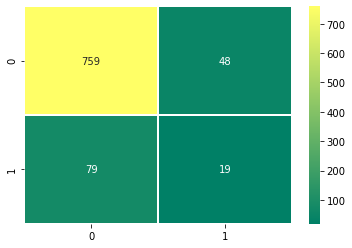

In [6]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=list(test['y']), y_pred=list((pred)))
sns.heatmap(cm, annot=True,fmt="d",linewidths=.5, cmap="summer")
plt.show()

In [7]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, pred))

Accuracy: 0.8596685082872928
Precision: 0.2835820895522388
Recall: 0.19387755102040816


In [8]:
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# from sklearn.model_selection import cross_val_predict

#pred = model.predict_proba(test[['age','balance','duration']])[:, 1] #Remember to add [:, 1], otherwise, it will spit an error
#pred = model.predict(test[['age','balance','duration']])

# pred = cross_val_predict(model, X_train, y_train, cv = 3, method = "decision_function")

# fpr, tpr, thresholds = roc_curve(y_true=list(test['y']), y_score=list(pred))
# auc = roc_auc_score(y_true=list(test['y']), y_score=list(pred))

# #create ROC curve
# plt.plot(fpr,tpr,label="AUC="+str(auc))
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.legend(loc=4)
# plt.show()

For roc/auc, check this: https://statisticallyrelevant.com/stochastic-gradient-descent-in-python/
This might also help: https://web.cs.ship.edu/~djmoon/ml/ml-notes/python-scikit-classification.pdf 